# Zbiór danych klientów banku w UK

## W tym projekcie naszym celem jest analiza danych z interaktywną wizualizacją zbioru danych klientów banku w UK.

### Kolejnymi krokami projektu będą:
1. Prezentacja danych ze statystykami oraz charakterystyką zależności w zbiorze
2. Czyszczenie danych w razie konieczności oraz dostosowanie formatu danych do późniejszej analizy
3. Przedstawienie wykresów dla zbioru danych potrzebnych do późniejszych wizualizacji i uczenia maszynowego
4. Podział zbioru na dane wejściowe i wyjściowe.
5. Utworzenie modelu dla algorytmów uczenia maszynowego i określenie dokładności
6. Wykorzystanie interaktywnych elementów w wizualizacji
7. Storytelling z wizualizacją

### Importowanie bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
import plotly.graph_objects as go
import seaborn as sns; sns.set(color_codes=True)  # visualization tool

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error as mae
import ipywidgets as widgets
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 1. Prezentacja danych ze statystykami oraz charakterystyką zależności w zbiorze

Wczytanie zbioru danych oraz inforamcja o ilości wierszy i kolumn.

In [2]:
df = pd.read_csv('UK-Bank-Customers.csv', sep=';')
df.shape

(4012, 9)

Nazwa kolumn w zbiorze oraz pierwsze 10 rekordów

In [3]:
df.columns

Index(['Customer ID', 'Name', 'Surname', 'Gender', 'Age', 'Region',
       'Job Classification', 'Date Joined', 'Balance'],
      dtype='object')

In [4]:
df.head(10)

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.01.2015,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.01.2015,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.01.2015,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.01.2015,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.01.2015,35639.79
5,300000006,Ava,Coleman,Female,30,Wales,Blue Collar,09.01.2015,122443.77
6,100000007,Dorothy,Thomson,Female,34,England,Blue Collar,11.01.2015,42879.84
7,200000008,Lisa,Knox,Female,48,Scotland,Other,11.01.2015,36680.17
8,300000009,Ruth,Campbell,Female,33,Wales,White Collar,11.01.2015,74284.35
9,100000010,Dominic,Parr,Male,42,England,White Collar,12.01.2015,10912.45


#### Statystyki dla danych numerycznych( średnia, liczba wystąpień...)

In [5]:
df.describe()

,Customer ID,Age,Balance
count,4.012000e+03,4012.000000,4012.000000
mean,1.696431e+08,38.609422,39778.661697
std,8.865066e+07,9.819221,29860.033803
min,1.000000e+08,15.000000,11.520000
25%,1.000020e+08,31.000000,16123.322500
50%,1.000038e+08,37.000000,33573.395000
75%,2.000031e+08,45.000000,57541.655000
max,4.000038e+08,64.000000,183467.700000


#### Liczba wartości brakujących w zbiorze

In [6]:
df.isnull().sum()

Customer ID           0
Name                  0
Surname               0
Gender                0
Age                   0
Region                0
Job Classification    0
Date Joined           0
Balance               0
dtype: int64

#### Liczba duplikatów w zbiorze

In [7]:
dups = df.duplicated()

In [8]:
print(dups.any())

False


In [9]:
dups = df['Customer ID'].duplicated()

In [10]:
print(dups.any())

False


#### Liczba wartości unikalnych w kolumnach

In [11]:
counts = df.nunique()

In [12]:
print(counts)

Customer ID           4012
Name                   172
Surname                150
Gender                   2
Age                     49
Region                   4
Job Classification       3
Date Joined            307
Balance               4010
dtype: int64


#### Typy danych w kolumnach

In [13]:
print (df.dtypes)

Customer ID             int64
Name                   object
Surname                object
Gender                 object
Age                     int64
Region                 object
Job Classification     object
Date Joined            object
Balance               float64
dtype: object


### 2. Czyszczenie danych w razie konieczności oraz dostosowanie formatu danych do późniejszej analizy

##### Okazało się, że czyszczenie danych nie jest konieczne, ponieważ jak wynika z wcześniej zaprezentowanych zależności zbiór nie posiada ani duplikatów, ani wartości brakujących. Konieczne jest jednak dostosowanie formatu danych na potrzeby późniejszej analizy.

#### Zamiana formatu kolumny Data Joined ze string na int, ponieważ w takiej formie będzie można go użyć później przy ML.

In [14]:
df['Date Joined'] = df['Date Joined'].str.replace(".", "")

In [15]:
df['Date Joined'] = df['Date Joined'].astype('int')

In [16]:
df.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,5012015,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,6012015,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,7012015,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,8012015,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,9012015,35639.79


In [17]:
print (df.dtypes)

Customer ID             int64
Name                   object
Surname                object
Gender                 object
Age                     int64
Region                 object
Job Classification     object
Date Joined             int32
Balance               float64
dtype: object


#### Transformacja danych nienumerycznych na numeryczne

Płeć zostanie zastapiona wartościami 0 lub 1, gdzie wartosć 1 będzie reprezentować mężczyzn, a wartość 0 kobiety

In [18]:
df["Gender"] = df["Gender"].replace({"Male": "1", "Female": "0"})

Region zostanie zastapiony wartościami 0 , 1, 2, 3, gdzie 0 to England, 1 - Northern Ireland, 2 - Wales i 3 - Scotland

In [19]:
df["Region"] = df["Region"].replace({"England": "0", "Northern Ireland": "1", "Wales": "2", "Scotland": "3"})

Klasyfikacja pracy zostanie zastapiona wartościami 0 , 1, 2 gdzie 0 to White Collar, 1 - Blue Collar i 2 - Other 

In [20]:
df["Job Classification"] = df["Job Classification"].replace({"White Collar": "0", "Blue Collar": "1", "Other": "2"})

#### Zamiana typu danych

In [21]:
print (df.dtypes)

Customer ID             int64
Name                   object
Surname                object
Gender                 object
Age                     int64
Region                 object
Job Classification     object
Date Joined             int32
Balance               float64
dtype: object


In [22]:
df['Gender'] = df['Gender'].astype('int')

In [23]:
df['Region'] = df['Region'].astype('int')

In [24]:
df['Job Classification'] = df['Job Classification'].astype('int')

In [25]:
print (df.dtypes)

Customer ID             int64
Name                   object
Surname                object
Gender                  int32
Age                     int64
Region                  int32
Job Classification      int32
Date Joined             int32
Balance               float64
dtype: object


#### Ponowne wyświetlenie statystyk oraz pierwszych 10 wierszy

In [26]:
df.describe()

,Customer ID,Gender,Age,Region,Job Classification,Date Joined,Balance
count,4.012000e+03,4012.000000,4012.000000,4012.000000,4012.000000,4.012000e+03,4012.000000
mean,1.696431e+08,0.539133,38.609422,1.151047,0.764457,1.679633e+07,39778.661697
std,8.865066e+07,0.498528,9.819221,1.328444,0.826875,8.620018e+06,29860.033803
min,1.000000e+08,0.000000,15.000000,0.000000,0.000000,1.022015e+06,11.520000
25%,1.000020e+08,0.000000,31.000000,0.000000,0.000000,1.007202e+07,16123.322500
50%,1.000038e+08,1.000000,37.000000,0.000000,1.000000,1.707202e+07,33573.395000
75%,2.000031e+08,1.000000,45.000000,3.000000,2.000000,2.409202e+07,57541.655000
max,4.000038e+08,1.000000,64.000000,3.000000,2.000000,3.110202e+07,183467.700000


In [27]:
df.head(10)

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,1,21,0,0,5012015,113810.15
1,400000002,Jasmine,Miller,0,34,1,1,6012015,36919.73
2,100000003,Liam,Brown,1,46,0,0,7012015,101536.83
3,300000004,Trevor,Parr,1,32,2,0,8012015,1421.52
4,100000005,Deirdre,Pullman,0,38,0,1,9012015,35639.79
5,300000006,Ava,Coleman,0,30,2,1,9012015,122443.77
6,100000007,Dorothy,Thomson,0,34,0,1,11012015,42879.84
7,200000008,Lisa,Knox,0,48,3,2,11012015,36680.17
8,300000009,Ruth,Campbell,0,33,2,0,11012015,74284.35
9,100000010,Dominic,Parr,1,42,0,0,12012015,10912.45


### 3. Przedstawienie wykresów dla zbioru danych potrzebnych do późniejszych wizualizacji i uczenia maszynowego

Histogram ukazuje rozłożenie wieku klientów banku w UK

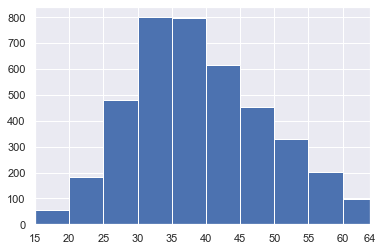

In [28]:
xlim_min=min(df['Age'])
xlim_max=max(df['Age'])
bins = [xlim_min,20,25,30,35,40,45,50,55,60,xlim_max]
plt.hist(df['Age'], bins = bins)

plt.xlim(xlim_min, xlim_max)
plt.xticks(bins)
plt.show()

Histogram ukazujący rozłożenie klientów w różnych regionach UK,  gdzie 0 to England, 1 - Northern Ireland, 2 - Wales i 3 - Scotland

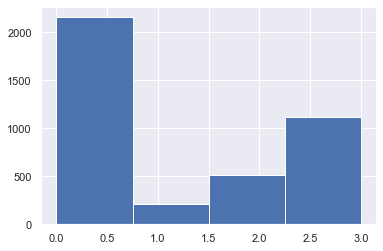

In [29]:
plt.hist(df['Region'], bins = 4)
plt.show()

Tree map ukazujący udział danej kategorii pracy w danych

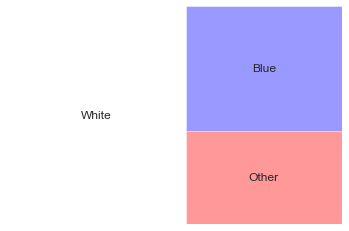

In [30]:
tm = pd.DataFrame({'Job Classification':[8,3,4], 'group':["White", "Other", "Blue"] })
squarify.plot(sizes=[8,3,4],  label=tm['group'], color=["white","red","blue"], alpha=.4 )
plt.axis('off')
plt.show() 

##### Scatter plots

Poniżej przedstawiono wykres punktowy przedstawiający jakie saldo jest najpopularniejsze w jakim wieku

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Balance', ylabel='Age'>

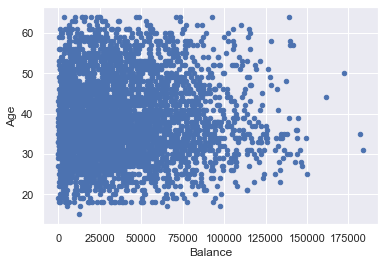

In [31]:
df.plot.scatter(x = 'Balance', y = 'Age')

##### Bubble plot z podziałem na regiony 

Każdy kolor odpwada innemu regionowi w UK oraz ukazuje w jakim wieku jaki saldo w danym regionie jest najpopularniejsze, gdzie 0 to England, 1 - Northern Ireland, 2 - Wales i 3 - Scotland

Kolory zostały wybrane na podstawie flag tych regionów oprócz Połnocnej Irlandii, która ma takie same kolory jak Anglia - England: czerwony , Northern Ireland: pomarańczowy , Wales: zielony , Scotland: niebieski

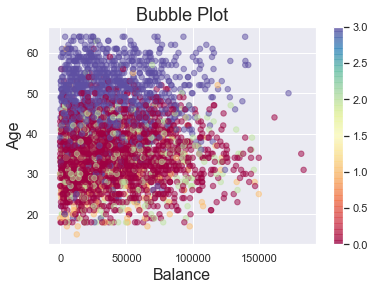

In [32]:
plt.scatter('Balance', 'Age',
             c=df['Region'],
             cmap='Spectral',
             s=30,
             alpha=0.5, 
             data=df)
plt.xlabel("Balance", size=16)
plt.ylabel("Age", size=16)
plt.title("Bubble Plot", size=18)
plt.colorbar()

plt.show()

Wykres ramkowy pokazujący wiek klientów banku w zależności od regionu UK

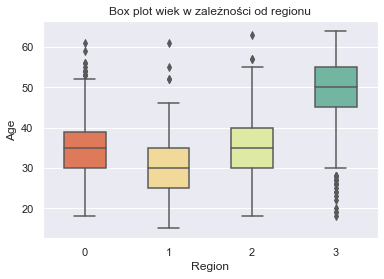

In [33]:
sns.boxplot(y='Age', x='Region', 
                 data=df, 
                 width=0.5,
                 palette="Spectral")
plt.title("Box plot wiek w zależności od regionu")
plt.suptitle("")
plt.xlabel("Region")
plt.ylabel("Age")
plt.show()

### 4. Podział zbioru na dane wejściowe i wyjściowe.

Na początku usunięmy dane, których nie potrzebujemy czyli imię i nazwisko klienta, ponieważ ten typ danych nie jest przetwarzany podczas predykcji lub nie wnosi do niej żadnych wartościowych informacji

In [34]:
df = df.drop(columns=['Name', 'Surname', 'Customer ID'])

Daną, którą będziemy przewidywać będzie Region, z którego pochodzi klient, dlatego musimy go usunąć ze zbioru oraz osobno utworzyc zbiór z przewidywaną wartością:

In [35]:
X = df.drop(columns=['Region'])
y = df['Region']

Podział na zbiór treningowy i testowy

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

### 5. Utworzenie modelu dla algorytmów uczenia maszynowego i określenie dokładności

##### Tworzymy model drzewa decyzyjnego

In [37]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

Na podstawie wcześniej usuniętych ze zbioru wierszy sprawdzimy czy model poprawnie przewidzi region

200004013	Christian	Reid	Male	51	Scotland-3	Blue Collar	30.12.2015	239.45

300004014	Stephen	     May	Male	33	Wales-2	    Blue Collar	30.12.2015	30293.19

In [38]:
predictions = model.predict([[1, 51, 1, 30122015,239.45],[1, 33, 1, 30122015, 30293.19]])
predictions

array([3, 3])

Jak widzimy w pierwszym przypadku kraj pochodzenia klienta został przewidziany poprawnie, natomiast w drugim przypadku nie, może być to spowodowane małą ilością klientów z Walii, która sprawia, że klient zostaje przydzielony do bzłego regionu

Następnie zweryfikujemy dokładność modelu

In [39]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
score

0.5965130759651308

Dokładność zmienia się nieznacznie z każdym uruchomieniem kodu, ponieważ są zaciągane inne dane testowe
Jak widzimy dokładność modelu wynosi ok.60 % możemy przyjąć, że wiąże się to z małą ilością danych dla niektórych regionów UK, gdzie klienci banku zaczęli się dopiero pojawiać.

##### Zastosowanie prostej regresji liniowej

In [40]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

Wylicznie średnigo błądu bezwzględnego dla regresji liniowej

In [41]:
k = mae(pred, y_test)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     0.8527624581265905


Średni błąd bezwględny jest bardzo wysoki dla wyliczonej regresji, jeżeli weźmiemy pod uwagę, że wartości Regionów są wartościami co 1!

### 6. Wykorzystanie interaktywnych elementów w wizualizacji

Histogram wieku klientów banku z regulowanym odstępem

In [42]:
def myPlot(c):
    bins=range(min(df['Age']), max(df['Age']) + c_slide.value, c_slide.value)
    plt.hist(df['Age'], bins)
    plt.ylabel('Liczba klientów')
    plt.xlabel('Age')
    plt.xlim(min(df['Age']), max(df['Age']))
    plt.xticks(bins)
    
      
c_slide= widgets.IntSlider(
    value=5,
    min=5,
    max=20,
    step=5,
    description='Podziałka:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
widgets.interact(myPlot,c=c_slide)

interactive(children=(IntSlider(value=5, continuous_update=False, description='Podziałka:', max=20, min=5, ste…

<function __main__.myPlot(c)>

Zamieniamy wartości salda na całkowite, ponieważ liczby po przecinku w tym przypadku nie mają większego znaczenia

In [43]:
df['Balance'] = df['Balance'].astype('int')

Histogram salda klientów z podziałem na regiony

In [44]:
def myPlot2(x):
    
    ds = df.loc[df['Region'] == c_dropdown.value]
    bins=range(0, max(df['Balance']) + 15000, 15000)   
    plt.hist(ds.Balance, bins)
                
    plt.ylabel('Liczba klientów z danym balansem')
    plt.xlabel('Balance')
    plt.xlim(0, max(df['Balance']))
    plt.xticks(bins)
      
c_dropdown= widgets.Dropdown(
    options=[('England', 0), ('Northern Ireland', 1), ('Wales', 2), ('Scotland', 3)],
    value= 0 ,
    description='Region:'

)
widgets.interact(myPlot2,x=c_dropdown)

interactive(children=(Dropdown(description='Region:', options=(('England', 0), ('Northern Ireland', 1), ('Wale…

<function __main__.myPlot2(x)>

Histogram płci klientów pozwalający na ukrycie nazw osi lub ich pokazanie.

In [45]:
def myPlot3(a):  
    plt.hist(df.Gender)          
    if c_checkbox.value == True:
        plt.xlabel('Płeć')
        plt.ylabel('Liczba klientów')
    else:
        plt.show()
     
    
c_checkbox =widgets.Checkbox(
    value=False,
    description='Pokaż nazwy osi',
    disabled=False,
    indent=False
    
)
widgets.interact(myPlot3,a=c_checkbox)

interactive(children=(Checkbox(value=False, description='Pokaż nazwy osi', indent=False), Output()), _dom_clas…

<function __main__.myPlot3(a)>

### 7.Storytelling z wizualizacją

Jak widać na poniższym wykresie nasz bank posiada klientów w różnych regionach UK, gdzie 0 to England, 1 - Northern Ireland, 2 - Wales i 3 - Scotland

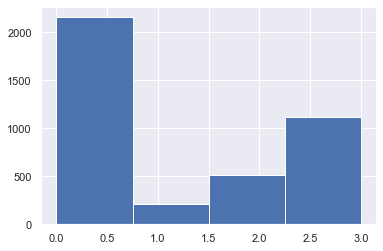

In [46]:
plt.hist(df['Region'], bins = 4)
plt.show()

Większość klientów jest z Anglii, a następnie ze Szkocji

Posiadamy również klientów w Walii, chociaż na razie jest ich poniżej 500

In [47]:
def myPlot4(x):
    
    ds = df.loc[df['Region'] == c_dropdown.value]
    bins=range(0, max(df['Age']) + 5, 5)   
    plt.hist(ds.Age, bins)
                
    plt.ylabel('Liczba klientów z danym balansem')
    plt.xlabel('Age')
    plt.xlim(0, max(df['Age']))
    plt.xticks(bins)
      
c_dropdown= widgets.Dropdown(
    options=[('England', 0), ('Northern Ireland', 1), ('Wales', 2), ('Scotland', 3)],
    value= 2 ,
    description='Region:'

)
widgets.interact(myPlot4,x=c_dropdown)

interactive(children=(Dropdown(description='Region:', index=2, options=(('England', 0), ('Northern Ireland', 1…

<function __main__.myPlot4(x)>

Większość klientów z Wali jest w wieku pomiędzy 30, a 40 lat.

In [48]:
def myPlot5(x):
    
    ds = df.loc[df['Region'] == c_dropdown.value]
    bins=range(0, max(df['Balance']) + 15000, 15000)   
    plt.hist(ds.Balance, bins)
                
    plt.ylabel('Liczba klientów z danym balansem')
    plt.xlabel('Balance')
    plt.xlim(0, max(df['Balance']))
    plt.xticks(bins)
      
c_dropdown= widgets.Dropdown(
    options=[('England', 0), ('Northern Ireland', 1), ('Wales', 2), ('Scotland', 3)],
    value= 2 ,
    description='Region:'

)
widgets.interact(myPlot5,x=c_dropdown)

interactive(children=(Dropdown(description='Region:', index=2, options=(('England', 0), ('Northern Ireland', 1…

<function __main__.myPlot5(x)>

A największy odsetek klientów posiada saldo pomiędzy 15 tys, a 25 tys.

Natomiast zdecydowana większość posiada saldo mniejsze niż 50 tys.

Następnie możemy porównać jakie zarobki są w różnych grupach pracy u kobiet pracujących w Walii

In [49]:
def myPlot7(x):
    
    
    ds = df.loc[df['Gender'] == 0]
    ds = df.loc[df['Region'] == 2]
    ds = df.loc[df['Job Classification'] == c_dropdown.value]
    bins=range(0, max(df['Balance']) + 25000, 25000)   
    plt.hist(ds.Balance, bins)
                
    plt.ylabel('Liczba klientów z danym balansem')
    plt.xlabel('Balance')
    plt.xlim(0, max(df['Balance']))
    plt.xticks(bins)
      
c_dropdown= widgets.Dropdown(
    options=[('White Collar', 0), ('Blue Collar', 1), ('Other', 2)],
    value= 0 ,
    description='Region:'

)
widgets.interact(myPlot7,x=c_dropdown)

interactive(children=(Dropdown(description='Region:', options=(('White Collar', 0), ('Blue Collar', 1), ('Othe…

<function __main__.myPlot7(x)>

Większość kobiecych klientów banku pracuje jako White Collar i w większości zarabiają mniej niż 50 tys.

Jak widzimy na pozwyższym przykładzie w storytellingu przechodzimy od ogółu do szczegółu w tym przypadku do szczegółowych rozkładów klientek w Walii.

Historia z adnotacjami jest oczywista i może dostarczyć wystarczających informacji, aby wiedzieć, gdzie firma musi zainwestować, aby skutecznie inwestować w odpowiednim czasie i rozwijać się.